In [12]:
import numpy as np                          
import os                                   
from sklearn.metrics import confusion_matrix
import seaborn as sn                        
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                  
import tensorflow as tf                     

In [13]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

In [14]:
def load_data():
    datasets = ['seg_train/seg_train', 'seg_test/seg_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = "../input/" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

In [15]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [16]:
print ("Number of training examples: {}" .format(train_labels.shape[0]))
print ("Number of testing examples: {}" .format(test_labels.shape[0]))
print ("Each image is of size: {}" .format(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


In [17]:
np.bincount(train_labels)

array([2512, 2382, 2404, 2191, 2274, 2271])

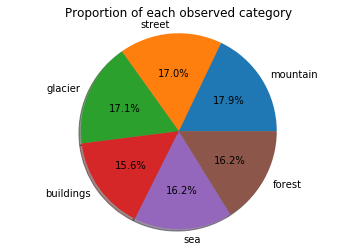

In [18]:
sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

In [19]:
train_images=train_images/255
test_images=test_images/255

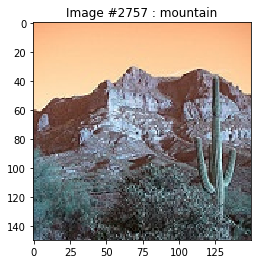

In [20]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

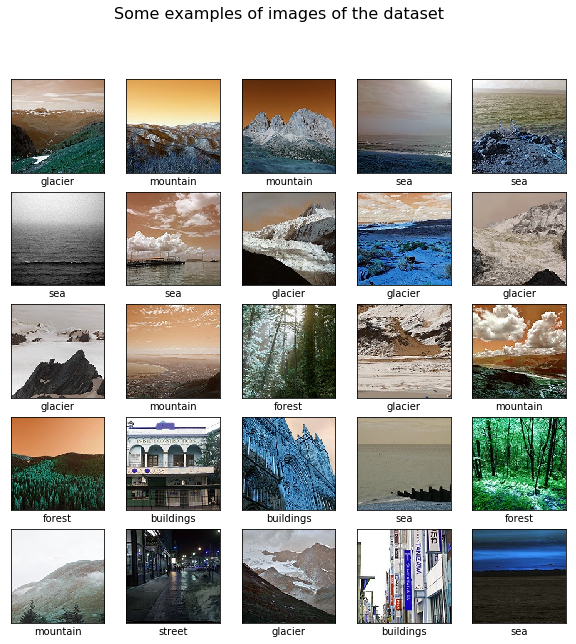

In [21]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [57]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(150,150,3)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(6,activation=tf.nn.softmax)])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 16)        4624      
__________

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 9s 789us/sample - loss: 1.2093 - acc: 0.5187 - val_loss: 0.9590 - val_acc: 0.6331
Epoch 2/15
11227/11227 [==============================] - 8s 688us/sample - loss: 0.9335 - acc: 0.6414 - val_loss: 0.8559 - val_acc: 0.6641
Epoch 3/15
11227/11227 [==============================] - 8s 683us/sample - loss: 0.7847 - acc: 0.7033 - val_loss: 0.7446 - val_acc: 0.7228
Epoch 4/15
11227/11227 [==============================] - 8s 687us/sample - loss: 0.7222 - acc: 0.7340 - val_loss: 0.6484 - val_acc: 0.7642
Epoch 5/15
11227/11227 [==============================] - 8s 684us/sample - loss: 0.6426 - acc: 0.7677 - val_loss: 0.6494 - val_acc: 0.7520
Epoch 6/15
11227/11227 [==============================] - 8s 699us/sample - loss: 0.5646 - acc: 0.7969 - val_loss: 0.5524 - val_acc: 0.7891
Epoch 7/15
11227/11227 [==============================] - 8s 685us/sample - loss: 0.5320 - acc: 0.8091 - val_lo

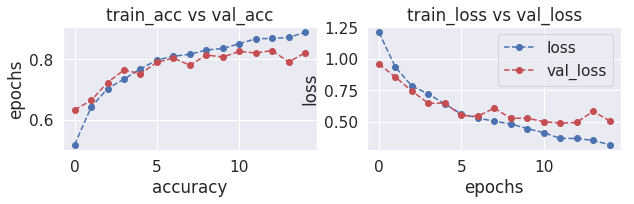

In [61]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['acc'],'bo--',label='accuracy')
plt.plot(history.history['val_acc'],'ro--',label='val_accuracy')
plt.title('train_acc vs val_acc')
plt.xlabel('accuracy')
plt.ylabel('epochs')

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [62]:
test_loss=model.evaluate(test_images,test_labels)

3000/3000 [==============================] - 1s 344us/sample - loss: 0.5207 - acc: 0.8247


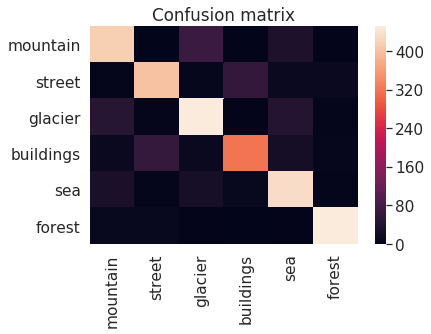

In [66]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()